In [310]:
import pandas as pd
import seaborn as sns
h = pd.read_csv("C://Users//DELL//Downloads//house_prices.csv//house_prices.csv")
h.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [311]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [312]:
h.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [313]:
h.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [314]:
h.isnull().sum()/len(h)*100

Index                  0.000000
Title                  0.000000
Description            1.612000
Amount(in rupees)      0.000000
Price (in rupees)      9.419776
location               0.000000
Carpet Area           43.018488
Status                 0.327946
Floor                  3.773776
Transaction            0.044259
Furnishing             1.544811
facing                37.451408
overlooking           43.425354
Society               58.485264
Bathroom               0.441527
Balcony               26.094352
Car Parking           55.114621
Ownership             34.936624
Super Area            57.422506
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

In [315]:
h.drop(['Index','Description','Status','overlooking','Society','Car Parking','Ownership','Super Area','Dimensions','Plot Area'],axis=1,inplace=True)

In [316]:
h.columns

Index(['Title', 'Amount(in rupees)', 'Price (in rupees)', 'location',
       'Carpet Area', 'Floor', 'Transaction', 'Furnishing', 'facing',
       'Bathroom', 'Balcony'],
      dtype='object')

In [317]:
import re

# 1. Extract number of BHKs from Title
def get_bhk(text):
    match = re.search(r'(\d+)\s*bhk', str(text).lower())
    if match:
        return int(match.group(1))
    return None

h['Title'] = h['Title'].apply(get_bhk)

# 2. Fill missing BHK values with median
h['Title'].fillna(h['Title'].median(), inplace=True)

# 3. Drop the original Title column
# h.drop(columns=['Title'], inplace=True)

In [318]:
h['Amount(in rupees)'].unique()

array(['42 Lac ', '98 Lac ', '1.40 Cr ', ..., '1.5 Lac ', '24.4 Lac ',
       '9.90 Cr '], dtype=object)

In [319]:
def convert_amount(val):
    val = val.strip()
    if 'Lac' in val:
        return float(val.replace('Lac', '').strip()) * 1e5
    elif 'Cr' in val:
        return float(val.replace('Cr', '').strip()) * 1e7
    else:
        return None

In [320]:
h['Amount(in rupees)'] = h['Amount(in rupees)'].apply(convert_amount)

In [321]:
h.head(3)

,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony
0,1.0,4200000.0,6000.0,thane,500 sqft,10 out of 11,Resale,Unfurnished,NaN,1,2
1,2.0,9800000.0,13799.0,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,2,NaN
2,2.0,14000000.0,17500.0,thane,779 sqft,10 out of 29,Resale,Unfurnished,East,2,NaN


In [322]:
h['Amount(in rupees)'].isnull().sum()

9684

<Axes: >

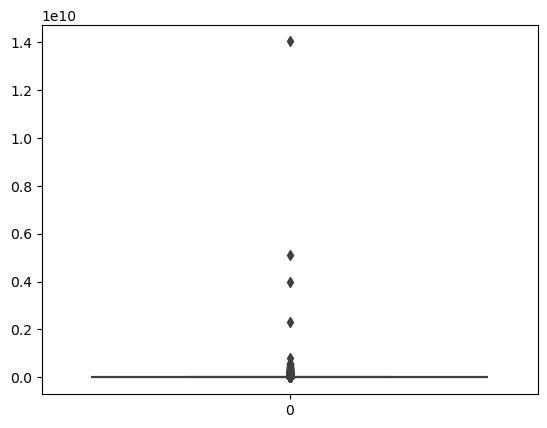

In [323]:
sns.boxplot(h['Amount(in rupees)'])

In [344]:
Q1 = h['Amount(in rupees)'].quantile(0.25)
Q3 = h['Amount(in rupees)'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper_limit = Q3 + (1.5) * IQR
lower_limit = Q1 - (1.5) * IQR
upper_limit,lower_limit

7800000.0 4850000.0


(12225000.0, 425000.0)

In [345]:
med = h['Amount(in rupees)'].median()
med

7800000.0

In [346]:
h['Amount(in rupees)'] = h['Amount(in rupees)'].apply(lambda x:med if x < lower_limit or x > upper_limit else x)

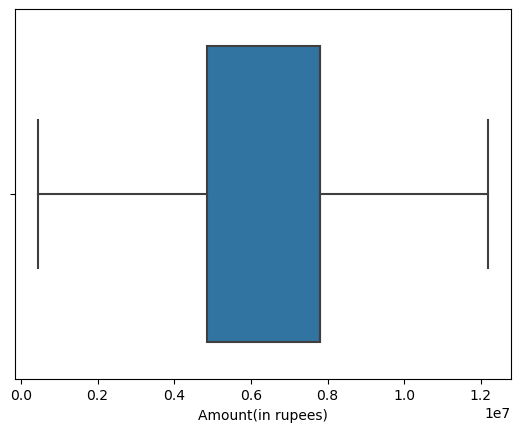

In [347]:
import matplotlib.pyplot as plt
sns.boxplot(x = h['Amount(in rupees)'])
plt.show()

In [401]:
# find thee outliers
#h.loc[(h['Amount(in rupees)'] < lower_limit) | (h['Amount(in rupees)'] > upper_limit)]
# capping - change the outlier valuer upper (or) lower limit values
#new_df = h.copy()
##new_df.loc[(new_df['Amount(in rupees)'] > upper_limit),'Amount(in rupees)'] = Q3
#new_df.loc[(new_df['Amount(in rupees)'] < lower_limit),'Amount(in rupees)'] = Q1

In [200]:
h.head(2)

,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony
0,1.0,4200000.0,6000.0,thane,500 sqft,10 out of 11,Resale,Unfurnished,NaN,1,2
1,2.0,9800000.0,13799.0,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,2,NaN


In [348]:
#2
h['Price (in rupees)'].isnull().sum()

17665

In [393]:
# 2
Q1 = h['Price (in rupees)'].quantile(0.25)
Q3 = h['Price (in rupees)'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
upper_limit,lower_limit
# find thee outliers
# new_df.loc[(new_df['Price (in rupees)'] < lower_limit) | (new_df['Price (in rupees)'] > upper_limit)]

6034.0 4333.0


(8585.5, 1781.5)

In [394]:
med = h['Price (in rupees)'].median()
med

6034.0

In [395]:
h['Price (in rupees)'] = h['Price (in rupees)'].apply(lambda x:med if x < lower_limit or x > upper_limit else x)

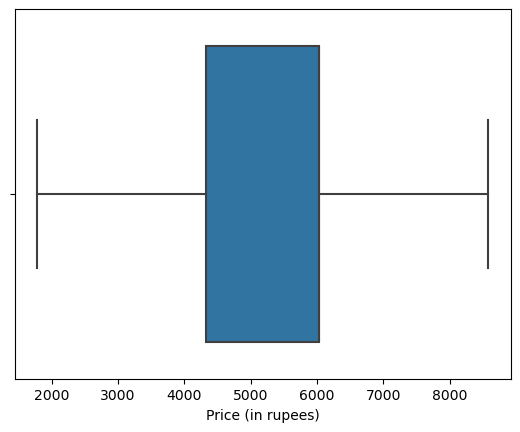

In [396]:
import matplotlib.pyplot as plt
sns.boxplot(x = h['Price (in rupees)'])
plt.show()

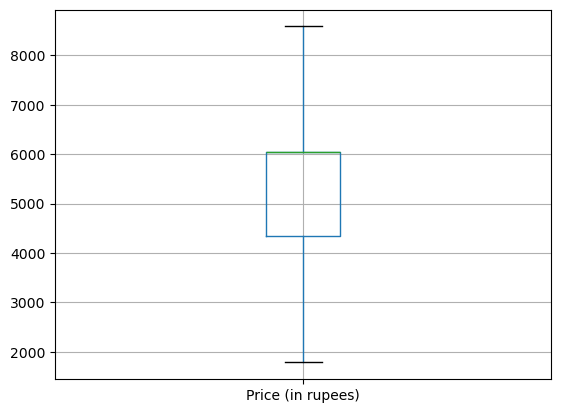

In [397]:
h.boxplot(column = 'Price (in rupees)')
plt.show()

In [398]:
h.columns

Index(['Title', 'Amount(in rupees)', 'Price (in rupees)', 'location',
       'Carpet Area', 'Floor', 'Transaction', 'Furnishing', 'facing',
       'Bathroom', 'Balcony'],
      dtype='object')

In [399]:
h

,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony
0,1.0,4200000.0,6000.0,thane,500 sqft,10 out of 11,Resale,Unfurnished,NaN,1,2
1,2.0,9800000.0,6034.0,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,2,NaN
2,2.0,7800000.0,6034.0,thane,779 sqft,10 out of 29,Resale,Unfurnished,East,2,NaN
3,1.0,2500000.0,NaN,thane,530 sqft,1 out of 3,Resale,Unfurnished,NaN,1,1
4,2.0,7800000.0,6034.0,thane,635 sqft,20 out of 42,Resale,Unfurnished,West,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
187526,3.0,6300000.0,3225.0,zirakpur,NaN,2 out of 4,New Property,Semi-Furnished,East,3,3
187527,3.0,5500000.0,3274.0,zirakpur,NaN,4 out of 6,Resale,Unfurnished,North - East,3,NaN
187528,3.0,7600000.0,4343.0,zirakpur,1250 sqft,1 out of 3,Resale,Furnished,East,3,2
187529,2.0,3000000.0,4231.0,zirakpur,NaN,2 out of 2,Resale,Semi-Furnished,NaN,2,NaN


In [116]:
#new_df['Carpet Area'].isnull().sum()
#new_df['Carpet Area'].fillna(new_df['Carpet Area'].median(),inplace = True)

80673

In [400]:
h['location'].isnull().sum()

0

In [401]:
h['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [402]:
def clean_carpet_area(area):
    # Handle missing or non-string values safely
    if not isinstance(area, str):
        return None

    # Extract number from the string
    digits = ''.join(c for c in area if c.isdigit())
    if digits == '':
        return None
    number = float(digits)

    # Convert square yard to sqft if needed
    area_lower = area.lower()
    if 'sqyrd' in area_lower or 'sqyd' in area_lower:
        return number * 9  # 1 sqyrd = 9 sqft
    else:
        return number  # assume it's already in sqft

# Apply to your DataFrame column
h['Carpet Area (sqft)'] = h['Carpet Area'].apply(clean_carpet_area)

In [403]:
h['Carpet Area (sqft)'].unique()

array([ 500.,  473.,  779., ...,  302., 1526., 1634.])

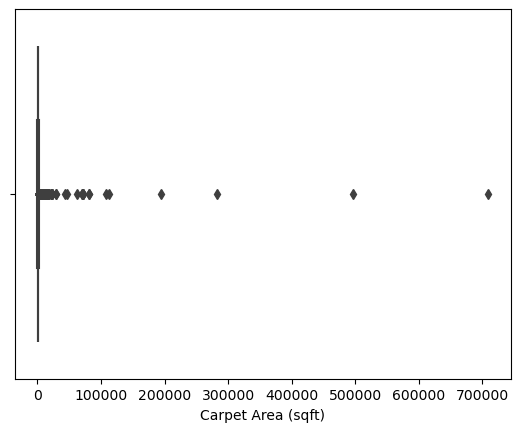

In [404]:
import matplotlib.pyplot as plt
sns.boxplot(x =h['Carpet Area (sqft)'])
plt.show()

In [413]:
Q1 = h['Carpet Area (sqft)'].quantile(0.25)
Q3 = h['Carpet Area (sqft)'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
upper_limit,lower_limit

1400.0 800.0


(2300.0, -100.0)

In [414]:
med = h['Carpet Area (sqft)'].median()
med

1060.0

In [415]:
h['Carpet Area (sqft)'] = h['Carpet Area (sqft)'].apply(lambda x:med if x < lower_limit or x > upper_limit else x)

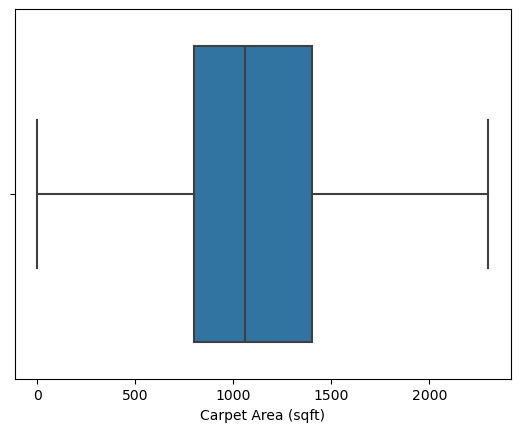

In [416]:
import matplotlib.pyplot as plt
sns.boxplot(x =h['Carpet Area (sqft)'])
plt.show()

In [417]:
h.isnull().sum()

Title                     0
Amount(in rupees)      9684
Price (in rupees)     17665
location                  0
Carpet Area           80673
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
Bathroom                828
Balcony               48935
Carpet Area (sqft)    80673
dtype: int64

In [265]:
# new_df.to_csv("cleaned_House_Prize.csv")

In [418]:
# Function to clean floor values
def clean_floor(val):
    val = str(val).lower().strip()
    if 'ground' in val:
        return 0
    elif 'basement' in val:
        return -1  # or any placeholder like -1 or NaN
    elif 'out of' in val:
        try:
            return int(val.split('out of')[0].strip())
        except:
            return None
    elif val.isdigit():
        return int(val)
    else:
        return None  # for NaN, unknown, or unhandled cases

# Apply cleaning function
h['Floor'] = h['Floor'].apply(clean_floor)

# Preview result
h[['Floor']].head()

,Floor
0,10.0
1,3.0
2,10.0
3,1.0
4,20.0


In [419]:
h['Floor'].unique()

array([ 10.,   3.,   1.,  20.,   2.,   4.,   0.,   6.,  16.,   8.,  18.,
         5.,  15.,  27.,  11.,   9.,  14.,  12.,   7.,  21.,  -1.,  nan,
        29.,  13.,  19.,  17.,  28.,  30.,  23.,  25.,  26.,  24.,  22.,
        50.,  32.,  33.,  40.,  35.,  42.,  63.,  38.,  34.,  60.,  31.,
        37.,  75.,  70.,  39.,  44.,  46.,  36.,  59.,  45.,  51., 200.])

In [432]:
Q1 = h['Floor'].quantile(0.25)
Q3 = h['Floor'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
upper_limit,lower_limit

3.0 2.0


(4.5, 0.5)

In [433]:
med = h['Floor'].median()
med

3.0

In [434]:
h['Floor'] = h['Floor'].apply(lambda x:med if x < lower_limit or x > upper_limit else x)

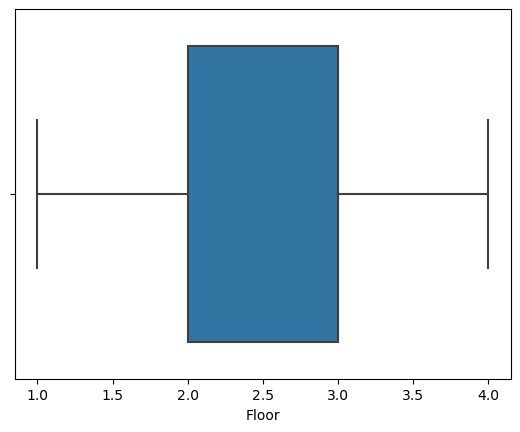

In [435]:
import matplotlib.pyplot as plt
sns.boxplot(x =h['Floor'])
plt.show()

In [436]:
h.head()

,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Carpet Area (sqft)
0,1.0,4200000.0,6000.0,thane,500 sqft,3.0,Resale,Unfurnished,NaN,1,2,500.0
1,2.0,9800000.0,6034.0,thane,473 sqft,3.0,Resale,Semi-Furnished,East,2,NaN,473.0
2,2.0,7800000.0,6034.0,thane,779 sqft,3.0,Resale,Unfurnished,East,2,NaN,779.0
3,1.0,2500000.0,NaN,thane,530 sqft,1.0,Resale,Unfurnished,NaN,1,1,530.0
4,2.0,7800000.0,6034.0,thane,635 sqft,3.0,Resale,Unfurnished,West,2,NaN,635.0


In [437]:
h['Transaction'].unique()

array(['Resale', 'New Property', nan, 'Other', 'Rent/Lease'], dtype=object)

In [438]:
h['Furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [439]:
h['facing'].unique()

array([nan, 'East', 'West', 'North - East', 'North', 'North - West',
       'South', 'South -West', 'South - East'], dtype=object)

In [442]:
h['Bathroom'].unique()

array([ 1.,  2.,  3.,  4.,  6., nan,  5., 10.,  9.,  8., 11.,  7.])

In [441]:
# Ensure numeric columns are of correct type
h["Bathroom"] = h["Bathroom"].replace('> 10', '11')
h["Bathroom"] = pd.to_numeric(h["Bathroom"], errors='coerce')

In [445]:
h['Balcony'].unique()

array([ 2., nan,  1.,  3.,  4., 11.,  6.,  5.,  7., 10.,  8.,  9.])

In [444]:
# Replace '> 10' with 11 and convert to numeric
h["Balcony"] = h["Balcony"].replace('> 10', '11')
h["Balcony"] = pd.to_numeric(h["Balcony"], errors='coerce')

In [451]:
h.to_csv("cleaned_House_prices.csv")

In [448]:
h.columns

Index(['Title', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony',
       'Carpet Area (sqft)'],
      dtype='object')

In [450]:
h.isnull().sum()

Title                 0
Amount(in rupees)     0
Price (in rupees)     0
location              0
Floor                 0
Transaction           0
Furnishing            0
facing                0
Bathroom              0
Balcony               0
Carpet Area (sqft)    0
dtype: int64

In [446]:
h.drop(['Carpet Area'],axis=1,inplace=True)

In [449]:
# 1 fill null values
h['Amount(in rupees)'].fillna(h['Amount(in rupees)'].median(), inplace=True)

# 2 
h['Price (in rupees)'].fillna(h['Price (in rupees)'].median(), inplace=True)

#
h['Carpet Area (sqft)'].fillna(h['Carpet Area (sqft)'].median(), inplace=True)

#
h['Floor'].fillna(h['Floor'].median(), inplace=True)

# 3 
h['Transaction'].fillna(h['Transaction'].mode()[0],inplace=True)

# 4
h['Furnishing'].fillna(h['Furnishing'].mode()[0],inplace=True)

# 5
h['facing'].fillna(h['facing'].mode()[0],inplace=True)

#6
h['Bathroom'].fillna(h['Bathroom'].median(),inplace=True)

#7
h['Balcony'].fillna(h['Balcony'].median(),inplace=True)